In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv(r'C:\Users\SAGAR\Documents\ashwini\latest_project\avishkar\K_means clustering\Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.shape

(440, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

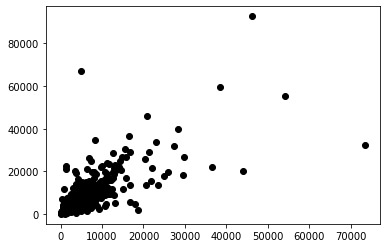

In [25]:
X = data[["Milk","Grocery"]]
#Visualise data points
plt.scatter(X["Milk"],X["Grocery"],c='black')
plt.show()

####  Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
####  Step 3 - Assign all the points to the closest cluster centroid
####  Step 4 - Recompute centroids of newly formed clusters
####  Step 5 - Repeat step 3 and 4

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_data = sc.fit_transform(data)

In [8]:
from sklearn.cluster import KMeans
kmean = KMeans()
kmean.fit(data)

KMeans()

In [9]:
Centroids = kmean.cluster_centers_

In [10]:
df_Centroid = pd.DataFrame(Centroids)

In [11]:
df_Centroid

,0,1,2,3,4,5,6,7
0,1.797753,2.584270,4578.191011,8812.494382,12785.494382,1493.494382,5448.382022,1507.101124
1,2.000000,2.392857,5778.071429,16665.321429,28742.500000,1726.142857,13360.428571,2074.178571
2,1.136364,2.659091,32837.522727,4951.022727,5582.090909,4236.727273,955.227273,1956.295455
3,1.000000,2.428571,68409.714286,7298.857143,8161.000000,11348.428571,1409.428571,3061.000000
4,2.000000,3.000000,29862.500000,53080.750000,60015.750000,3262.250000,27942.250000,3082.250000
5,1.209091,2.545455,16440.536364,3011.063636,4397.236364,3525.918182,1017.018182,1451.854545
6,1.333333,2.666667,31979.000000,32385.666667,18605.000000,34185.666667,1949.333333,23358.333333
7,1.058065,2.503226,4924.651613,2514.722581,3055.161290,2587.645161,822.412903,833.045161


Text(0, 0.5, 'Inertia')

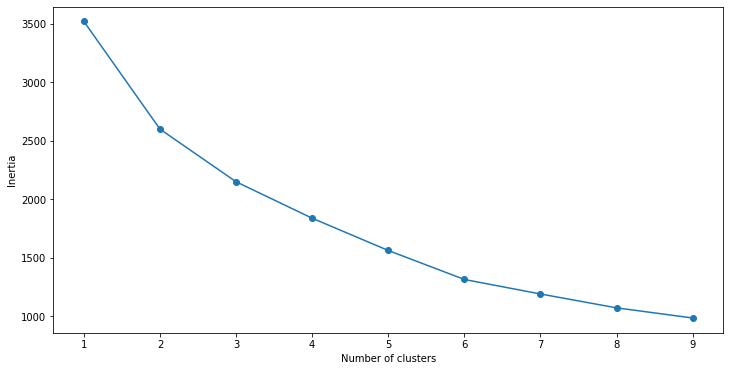

In [12]:
# fitting multiple k-means algorithms and storing the values in an empty list.find which is best K value
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(std_data)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')#check 4 is best potimal  K value.wich is having less inertia that will became best K value

In [13]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(std_data)

KMeans(n_clusters=4)

In [14]:
kmeans.labels_#0 1 2 3 4 differnt 4 grp.and show particular row belong to which grp.1s row belong to 3 rd grp.below list shows all rows

array([3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0,
       0, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 0, 0, 3, 3, 0, 0, 1, 3, 0, 0, 3, 1, 3, 3, 0, 1,
       0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 2, 3,

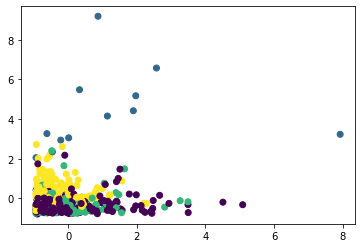

In [15]:
plt.scatter(std_data[:,2], std_data[:,3], c=kmeans.labels_)#4 diff grp .4 cluster diferntiate# :,2 all rows and 2nd clm
plt.show()

NameError: name 'data_scaled' is not defined

In [23]:
train = pd.read_csv("loan.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'loan.csv'

In [24]:
result = pd.DataFrame(X,columns= ["ApplicantIncome","LoanAmount"])

In [19]:
result["LoanApproval"] = target

NameError: name 'target' is not defined

In [ ]:
result

In [ ]:
train = pd.read_csv("loan.csv")

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
train.isnull().sum()

In [ ]:
X = train[["LoanAmount","ApplicantIncome"]]

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(scaled_data)

In [ ]:
train.Loan_Status = train.Loan_Status.apply(lambda x: 0 if x=="Y" else 1)#Y replace with 0 and N/otherwise replace with 1

In [ ]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=train.Loan_Status)

In [ ]:
kmean.labels_

In [ ]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmean.labels_)

In [ ]:
data = kmean.transform(scaled_data)

In [ ]:
kmean.labels_

In [ ]:
kmean.cluster_centers_

In [ ]:
result = pd.DataFrame(data,columns=["LoanAmount","ApplicantIncome"])
result["Predicted_Loan_Status"] = kmean.labels_

In [ ]:
result["Original_Loan_Status"] = train["Loan_Status"]

In [ ]:
result